In [1]:
%reload_ext autoreload
%autoreload 2

from IPython.display import Image

# Load a proteomics library

In [2]:
import synchroscan.synchropasef.loader_proteomics_library as loader_proteomics_library

In [42]:
library_name = r"D:\Patricia_nature_protocol_paper\library\MSFragger_whisper40_library.tsv"
analysis_software = "FragPipe" #'MaxQuant'
ptm = "None" #Options: 'None', 'Phospho', 'DiGly', ["EV", "LL"]

In [43]:
library = loader_proteomics_library.load_library(
        library_name,
        analysis_software,
        ptm,
    )

In [44]:
library

,mz,IM,Charge,Proteins,Peptide
0,344.816723,0.706492,3,O43242,C(UniMod:4)YYYHAR
7,344.827511,0.708812,3,Q16658,GEHGFIGC(UniMod:4)R
20,345.171915,0.709230,4,P49736,THVDSHGHNVFK
41,345.176028,0.708088,3,Q9Y3C8,IC(UniMod:4)LTDHFK
48,345.183072,0.710790,3,Q16543,SMVNTKPEK
...,...,...,...,...,...
2802620,1279.596945,1.276723,2,P43007,SNETNGYLDSAQAGPAAGPGAPGTAAGR
2802644,1279.658022,1.175395,3,P26368,AM(UniMod:35)QAAGQIPATALLPTM(UniMod:35)TPDGLAV...
2802679,1280.046716,1.279134,2,Q7L2E3,PSDC(UniMod:4)TLASAQC(UniMod:4)NEYSEEEELVK
2802695,1280.137914,1.275783,2,Q4KMQ1,GDLGPASPSQELGSQPVPGGDGAPALGK


In [45]:
library["Proteins"].drop_duplicates()

0          O43242
7          Q16658
20         P49736
41         Q9Y3C8
48         Q16543
            ...  
2780443    P68363
2785727    Q9H165
2785938    Q8IYI0
2790263    Q9UGM3
2800457    Q9ULK2
Name: Proteins, Length: 9137, dtype: object

# Define where the output should be saved

In [46]:
import synchroscan.synchropasef.method_creator as method_creator
folder_paths = "D\synchro_scan_test"
method_creator.create_folder(folder_paths)

# Create static plot

In [47]:
import synchroscan.synchropasef.plots as plots

In [48]:
xi, yi, zi = plots.kernel_density_calculation(library, 50)

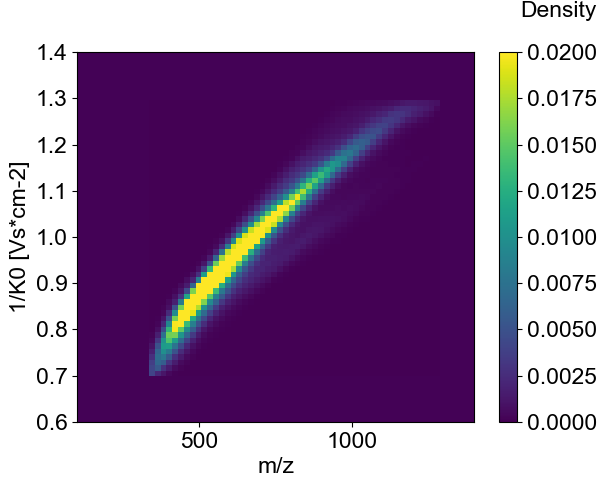

In [49]:
plot_parameters = {
    "plot_mz": [100, 1400],
    "plot_IM": [0.60, 1.4],
}


plots.density_plot(
    xi,
    yi,
    zi,
    plot_parameters,
    #"white_scheme"
    folder_paths + "density_plot.png"
)
# Image(folder_paths + "density_plot.png")

# Define scan area

In [11]:
import synchroscan.synchropasef.method_creator as method_creator
import synchroscan.synchropasef.method_evaluator as method_evaluator

In [12]:
scan_area= {
    "charge_state": [
        2,
        3
    ],
    "scan_area_width": 300,
}

scan_area_width = scan_area["scan_area_width"]
charge_state = scan_area["charge_state"]

In [13]:
scan_area_definition = method_creator.caclulate_scan_area_definitions(
    scan_area_width,
    charge_state,
    library
)
scan_area_definition

original scan area [(-350.0, 0.38659160885034766), (1610.0, 1.6467084804522232), (-50.0, 0.38659160885034766), (1910.0, 1.6467084804522232)]
please wait
coverage_tests     shift_in_mz  coverage
0           -50  0.927220
1           -45  0.932137
2           -40  0.936906
3           -35  0.941454
4           -30  0.945544
5           -25  0.949587
6           -20  0.953391
7           -15  0.956933
8           -10  0.960160
9            -5  0.963101
10            0  0.965708
11            5  0.967762
12           10  0.969507
13           15  0.970971
14           20  0.971495
15           25  0.971412
16           30  0.970787
17           35  0.969816
18           40  0.967977
19           45  0.965560
20           50  0.962666
best_shift 20


[(-330.0, 0.38659160885034766),
 (1630.0, 1.6467084804522232),
 (-30.0, 0.38659160885034766),
 (1930.0, 1.6467084804522232)]

# Plot and evaluate scan area

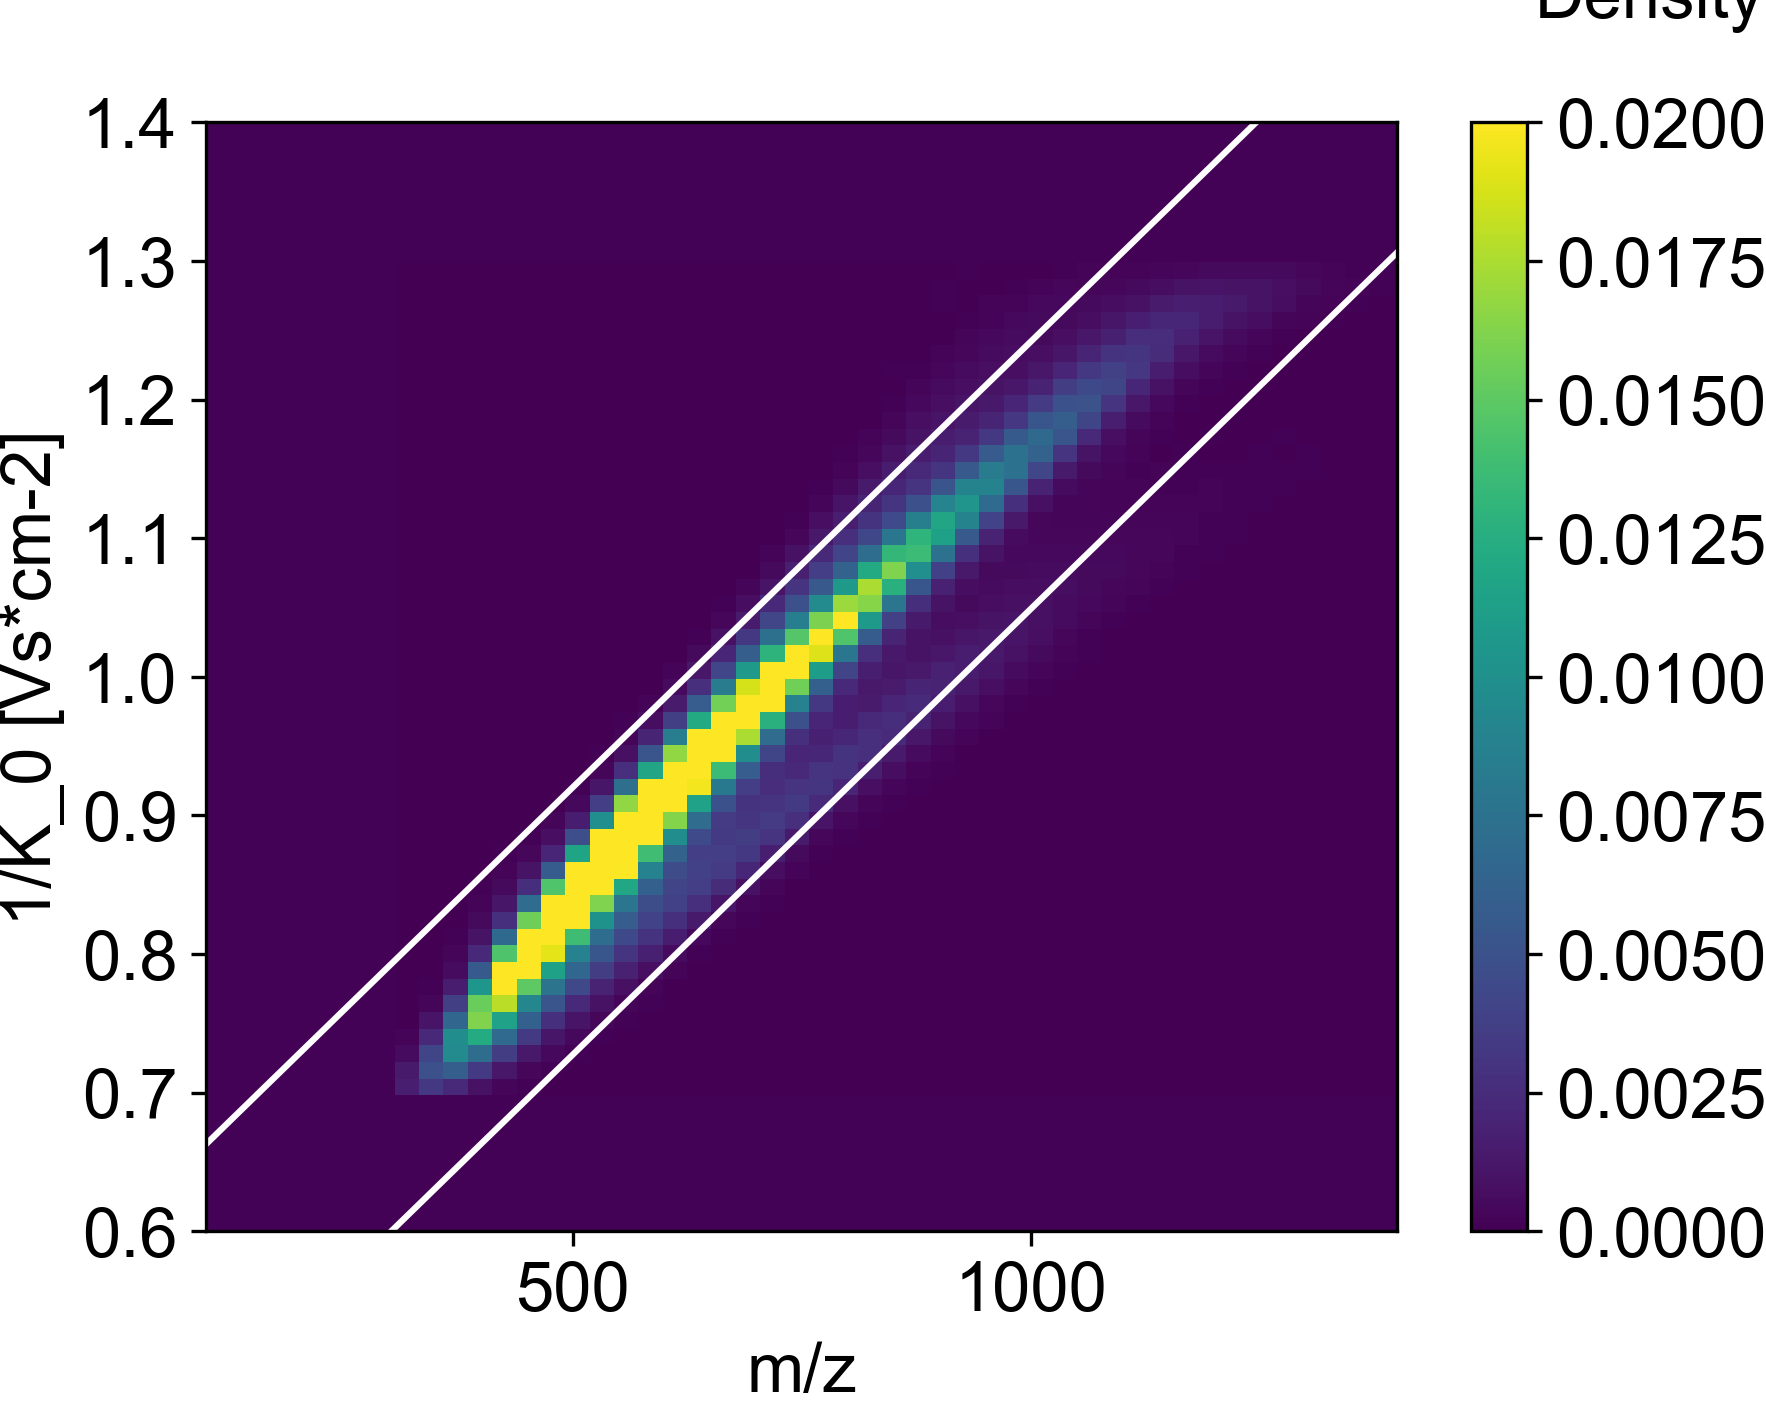

<Figure size 640x480 with 0 Axes>

In [14]:
plots.density_plot_plus_scan_area(
    xi,
    yi,
    zi,
    plot_parameters,
    folder_paths + "density_plot.png",
    scan_area_definition,
)
Image(folder_paths + "density_plot.png")

In [15]:
import synchroscan.synchropasef.method_evaluator as method_evaluator

In [16]:
library_coverage = library.copy()
coverage_center = method_evaluator.coverage_calculated_at_center(library_coverage, scan_area_definition)
coverage_center

0.9714950795077721

# Create a synchroscan method

### parameters

window_type: equidistant, variable, pre-definied

scan_mode: 'classical_synchro-PASEF', 'highly_accurate_synchro-PASEF', 'individual_synchro-PASEF'

window_modification: 'staggered', 'overlap', 'None'

window_overlap: required for overlap, overlap per window

no_of_combined_scans: required for staggered and classical synchro-PASEF

window_pattern: required for individual_synchro-PASEF: 
structure it like this: [[0, 2], [3,5], [6, 8], [9,12], [12,14]] 
-> scans = 15, scan_ratio = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [17]:
import synchroscan.synchropasef.method_creator as method_creator

In [18]:
save_at = r"D:\synchro_scan_test"

scan_area_dict = {
    "charge_state": scan_area["charge_state"], 
    "scan_area_width": scan_area["scan_area_width"],
    "scan_area": scan_area_definition,
    # "scan_area": [(-267.5, 0.38776857932457387), (1692.5, 1.6800081671134246), (-142.5, 0.38776857932457387), (1817.5, 1.6800081671134246)]
}

method_parameters = {
    "scans": 4,
    "window_type": "equidistant",
    "scan_ratio": [1, 1, 1, 1, 1],
    "scan_mode":  'classical_synchro-PASEF',
    "window_modification":  'None',
    "window_overlap": 0.2,
    "no_of_combined_scans": 3,
    "window_pattern": [[0, 2], [3,5], [6, 8], [9,12], [12,14]],
}
method_parameters_general = {
    "MS1_positions": [1],
    "dict_im_limits": {'low_limit_IM': 0.7,'up_limit_IM': 1.3}
}

method_creator.create_method(
    save_at,
    scan_area_dict["scan_area"],
    method_parameters,
    method_parameters_general,
    library
)

{} (-30.0, 0.38659160885034766) (1930.0, 1.6467084804522232)
{} (-330.0, 0.38659160885034766) (1630.0, 1.6467084804522232)


([1, 1, 1, 1], 4)

# Load Synchro-PASEF Method

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
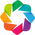

In [19]:
import synchroscan.synchropasef.loader_MS_parameter_file as loader_MS_parameter_file

In [20]:
open_name = r"D:\synchro_scan_test\synchroScan.txt"

df_parameters_final = loader_MS_parameter_file.load_MS_method_from_txt_file(
    open_name,
)
df_parameters_final

,type,mobility pos.1 [1/K0],mass pos.1 start [m/z],mass pos.1 end [m/z],mobility pos.2 [1/K0],mass pos.2 start [m/z]
0,ms,-,-,-,-,-
1,vista,0.7,157.5,232.5,1.3,1090.7
2,vista,0.7,232.5,307.5,1.3,1165.7
3,vista,0.7,307.5,382.5,1.3,1240.7
4,vista,0.7,382.5,457.5,1.3,1315.7


# Evaluate Synchro-PASEF Method

In [21]:
import synchroscan.synchropasef.plots as plots

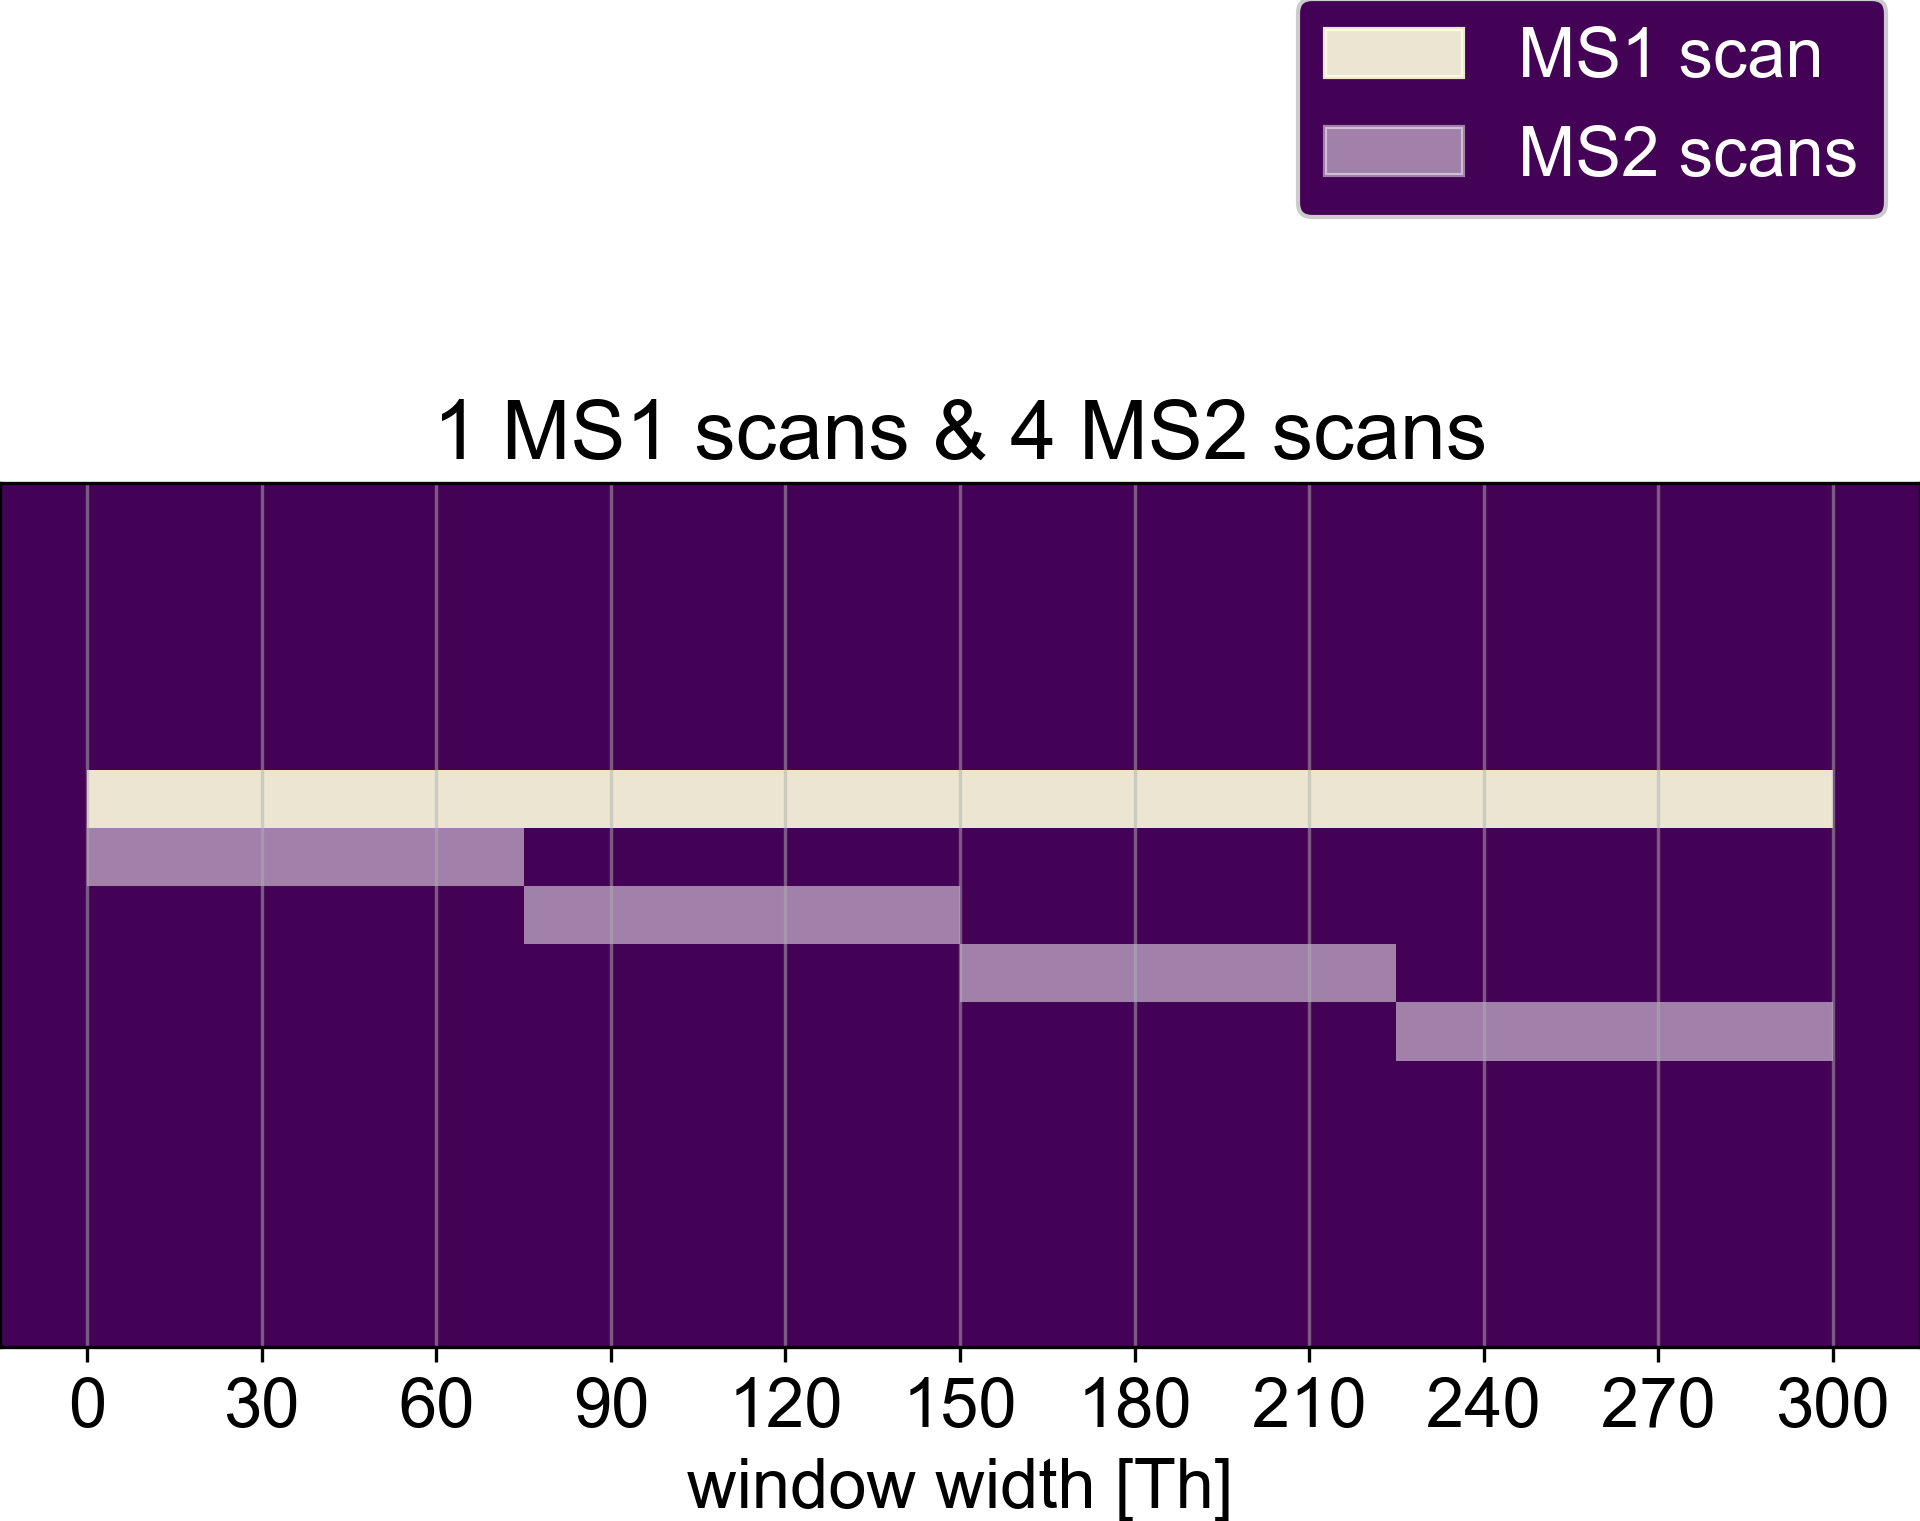

<Figure size 640x480 with 0 Axes>

In [22]:
plots.plot_acquisition_scheme(
    df_parameters_final,
    folder_paths + "acquisition_scheme.png"
)
Image(folder_paths + "acquisition_scheme.png")

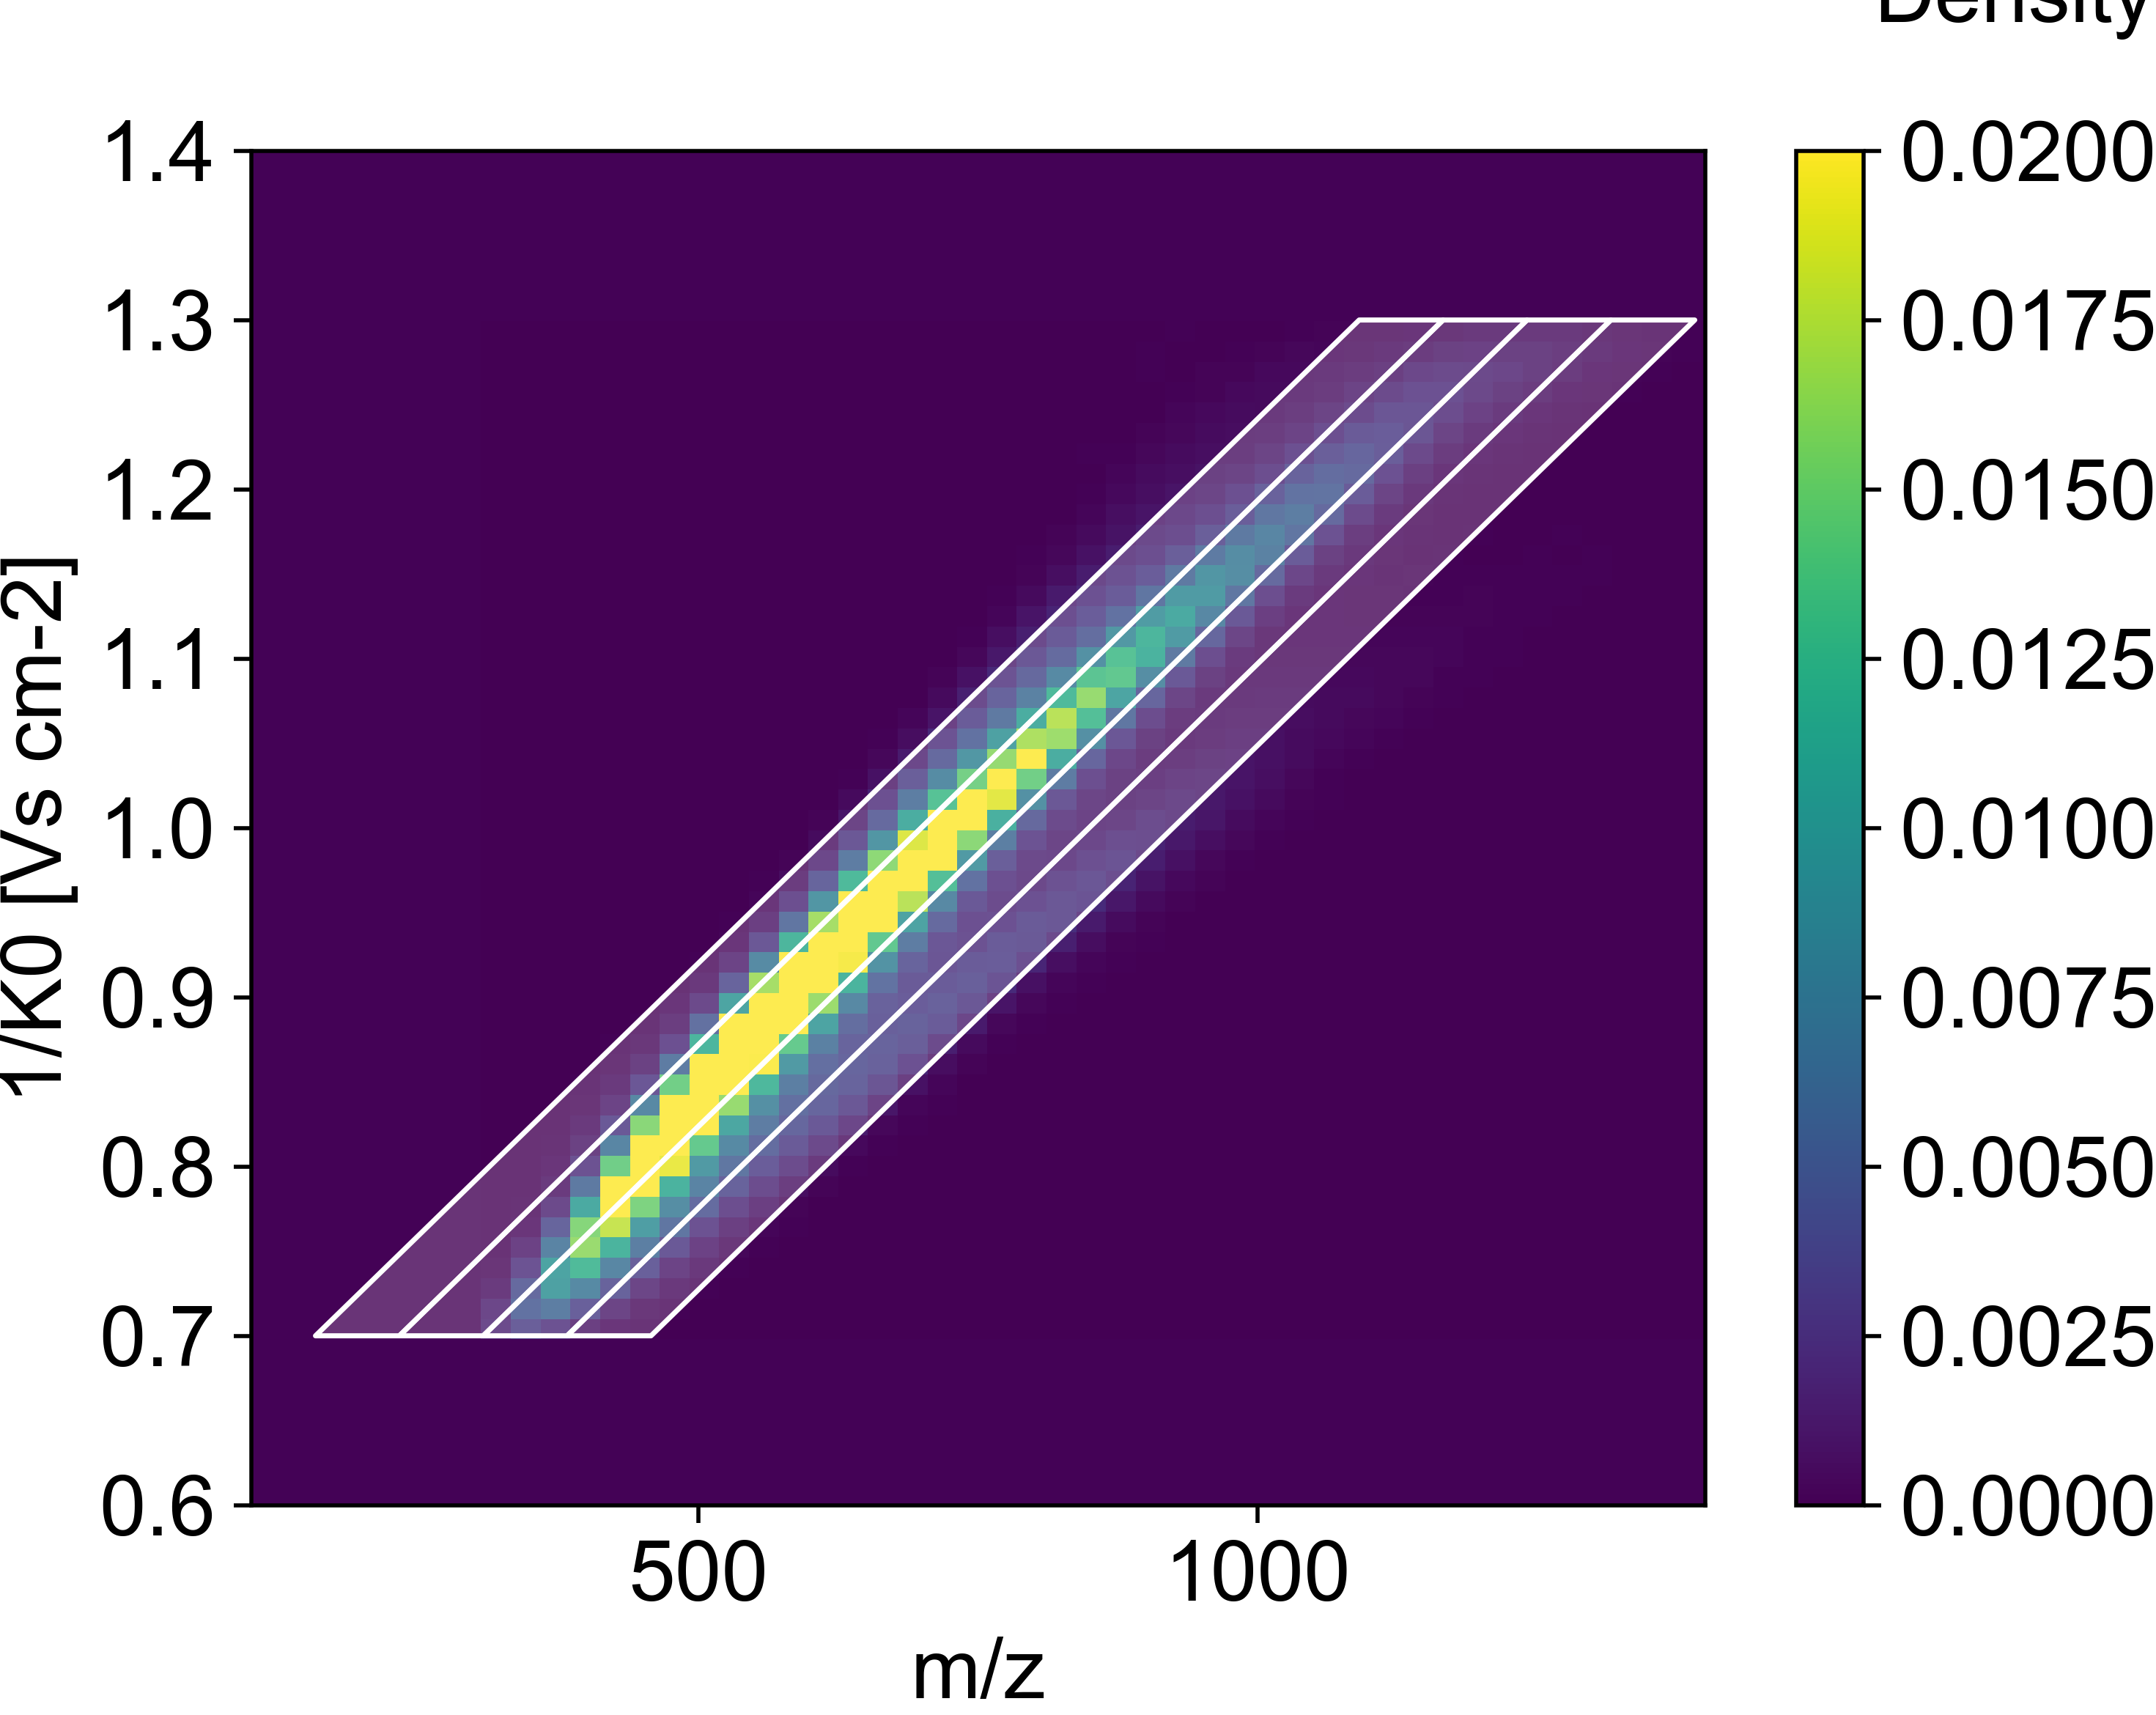

<Figure size 640x480 with 0 Axes>

In [23]:
plots.plot_method_and_precursors(
    xi,
    yi,
    zi,
    {'plot_mz': [100, 1400], 'plot_IM': [0.6, 1.4]},
    df_parameters_final,
    folder_paths + "acquisition_scheme_and_density_plot_polygone.png",
#     alpha=0.1,
#     window_color = "green",
#     color_scheme_name = "white_scheme"
)
Image(folder_paths + "acquisition_scheme_and_density_plot_polygone.png")

In [41]:
# optinal settings only applicable if library contains ion mobility length information for only this plot
acquisition_parameters = {
    "IM": [0.7, 1.3], # take from method generation
    "ramp_steps": 927,
}

if "IMlength" not in library.columns:
    next
elif acquisition_parameters["ramp_steps"]!="None":
    plots.histogram_precursor_slicing(
        400, 
        library,
        acquisition_parameters,
        df_parameters_final,
        folder_paths + "/final_method/histogram_slicing.png"
    )
    Image(folder_paths + "/final_method/histogram_slicing.png")

here


In [55]:
import pandas as pd

if "IMlength" not in library.columns:
    df_evaluated, _ = method_evaluator.calculate_coverage_total_per_scan_per_charge_state(df_parameters_final, library)
else:
    df_coverage, df_temp = method_evaluator.calculate_coverage_total_per_scan_per_charge_state(df_parameters_final, library)
    df_slicing = method_evaluator.calculate_slicing_and_coverage_in_total(library, df_temp)
    df_evaluated = pd.concat([df_coverage, df_slicing])
df_evaluated

here2
division by zero singly charged precursours are not present
here2
division by zero singly charged precursours are not present
here2
division by zero singly charged precursours are not present
here2
division by zero singly charged precursours are not present
here2
division by zero singly charged precursours are not present
{'scan': ['all synchro scans', '#synchro scan 1', '#synchro scan 2', '#synchro scan 3', '#synchro scan 4'], 'unique proteins in the library': 9137, 'unique precursors in the library': 167850, 'No. of covered proteins': [9101, 8513, 8121, 4940, 1676], 'No. of covered precursors': [159760, 81335, 62477, 13411, 2537], 'No. of covered, singly charged precursors': [0, 0, 0, 0, 0], 'No. of covered, doubly charged precursors': [119080, 73529, 42429, 3075, 47], 'No. of covered, triply charged precursors': [36701, 6454, 18081, 9739, 2427], 'No. of covered, quadruply charged precursors': [3731, 1222, 1863, 584, 62], 'proteins covered [%]': [99.6, 93.2, 88.9, 54.1, 18.3], 

,all synchro scans,#synchro scan 1,#synchro scan 2,#synchro scan 3,#synchro scan 4
unique proteins in the library,9137,9137,9137,9137,9137
unique precursors in the library,167850,167850,167850,167850,167850
No. of covered proteins,9101,8513,8121,4940,1676
No. of covered precursors,159760,81335,62477,13411,2537
"No. of covered, singly charged precursors",0,0,0,0,0
"No. of covered, doubly charged precursors",119080,73529,42429,3075,47
"No. of covered, triply charged precursors",36701,6454,18081,9739,2427
"No. of covered, quadruply charged precursors",3731,1222,1863,584,62
proteins covered [%],99.6,93.2,88.9,54.1,18.3
precursors covered [%] (counting IM peak at center),95.2,48.5,37.2,8.0,1.5


## make gif

In [49]:
import os
import imageio.v3 as iio

In [59]:
save_at = 'D:/synchro_scan_gif/'
method_creator.create_folder([save_at])

boxes, df_temp_reset_index = plots.generate_boxes(df_parameters_final, im_steps=100)

plots.generate_gif_single_windows(
    xi,
    yi,
    zi,
    plot_parameters,
    boxes,
    range(1, len(df_temp_reset_index)+1),
    save_at,
    facecolor="#FF0098",
    window_color = None,
    scans_plotted_at_once=1,
)

<Figure size 640x480 with 0 Axes>

In [60]:
png_dir = r"D:\synchro_scan_gif/"

In [65]:
png_dir = save_at[:-1]
print(save_at[:-1])
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(iio.imread(file_path))
iio.imwrite(save_at + 'SynchroScan_single_windows.gif', images, duration = 0.001, loop = 0)


D:/synchro_scan_gif
